<a href="https://colab.research.google.com/github/Vaish1005/First-repository/blob/main/toxic_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing dependencies

In [ ]:
pip install tensorflow pandas matplotlib scikit-learn

In [3]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
data = pd.read_csv('/content/drive/MyDrive/Data/train.csv')

In [7]:
data.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [8]:
from tensorflow.keras.layers import TextVectorization

In [9]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Data/train.csv')
x = data['comment_text']
y = data[data.columns[2:]].values

In [10]:
MAX_WORDS = 200000  # no. of words in vocabulary

In [11]:
vectorizer = TextVectorization(max_tokens=MAX_WORDS,
                               output_sequence_length=1500,
                               output_mode='int')

In [149]:
vectorizer.adapt(x.values)

In [14]:
vectorized_text = vectorizer(x.values)

In [15]:
vectorized_text

<tf.Tensor: shape=(159571, 1500), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [16]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.layers import TextVectorization

# Load the data and define x and y
data = pd.read_csv('/content/drive/MyDrive/Data/train.csv')
x = data['comment_text']
y = data[data.columns[2:]].values

MAX_WORDS = 200000  # no. of words in vocabulary
vectorizer = TextVectorization(max_tokens=MAX_WORDS,
                               output_sequence_length=1500,
                               output_mode='int')
vectorizer.adapt(x.values)

vectorized_text = vectorizer(x.values)
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset =  dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [17]:
batch_X, batch_Y = dataset.as_numpy_iterator().next()

In [18]:
batch_Y.shape

(16, 6)

In [19]:
len(dataset)*.7

6981.799999999999

In [20]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [150]:
train_generator = train.as_numpy_iterator()

In [151]:
train_generator.next()

(array([[   171,    312,     48, ...,      0,      0,      0],
        [    33,      7,     19, ...,      0,      0,      0],
        [ 11355, 186966,    104, ...,      0,      0,      0],
        ...,
        [   336,     23,      2, ...,      0,      0,      0],
        [  1751,   4945,   4856, ...,      0,      0,      0],
        [   176,      2,    108, ...,      0,      0,      0]]),
 array([[1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [152]:
train_generator = train.as_numpy_iterator()

In [153]:
train_generator.next()

(array([[    8,    69,    10, ...,     0,     0,     0],
        [    5,     7,    20, ...,     0,     0,     0],
        [   21,  1791,     7, ...,     0,     0,     0],
        ...,
        [  797,     8,    49, ...,     0,     0,     0],
        [95530,    38,  2864, ...,     0,     0,     0],
        [   49,    53,   518, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [27]:
model = Sequential()
# EMBEDDING LAYER
model.add(Embedding(MAX_WORDS+1, 32))
# bidirectional layer LSTM layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# feature extraction fully connected
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

In [28]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(train, epochs=3, validation_data=val)

Epoch 1/3
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 9519s 1s/step - loss: 0.0873 - val_loss: 0.0460
Epoch 2/3
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 9426s 1s/step - loss: 0.0449 - val_loss: 0.0416
Epoch 3/3
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 9132s 1s/step - loss: 0.0407 - val_loss: 0.0364


In [32]:
history.history

{'loss': [0.06401373445987701, 0.04593575745820999, 0.04158463329076767],
 'val_loss': [0.04604620486497879, 0.04161931201815605, 0.03643982857465744]}

In [33]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

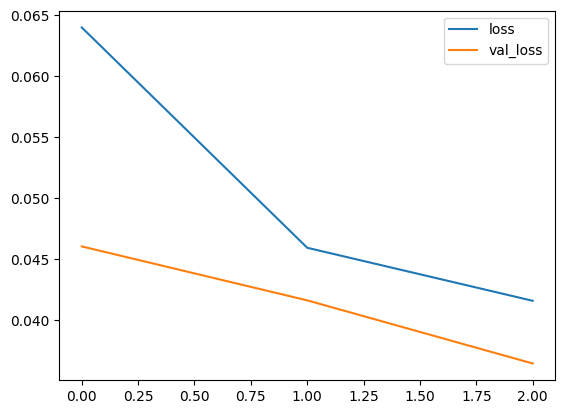

In [34]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [35]:
batch = test.as_numpy_iterator().next

In [156]:
input_text = vectorizer('you suck in politics')

In [54]:
data.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [55]:
batch = test.as_numpy_iterator().next()

In [56]:
batch_X, batch_Y = test.as_numpy_iterator().next()

In [57]:
batch_Y

array([[1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [157]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [158]:
res = model.predict(batch_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


In [159]:
res.flatten()

array([4.39030081e-01, 2.28086789e-03, 8.13484341e-02, 9.09523014e-03,
       1.28479525e-01, 5.11569120e-02, 2.46277690e-04, 8.93241747e-09,
       2.67232499e-05, 6.82334246e-07, 6.18603690e-06, 5.48719572e-06,
       5.61695360e-03, 5.33114962e-06, 1.06318714e-03, 1.07471773e-04,
       4.90109727e-04, 3.91414418e-04, 1.74857967e-04, 4.58852556e-09,
       1.81700780e-05, 3.98564424e-07, 3.80892106e-06, 3.47008768e-06,
       4.15357053e-02, 9.41838807e-05, 6.26732782e-03, 1.28814962e-03,
       6.69348612e-03, 4.17922623e-03, 8.26089061e-04, 1.08604709e-07,
       1.11420399e-04, 4.97890915e-06, 3.31402916e-05, 2.86480754e-05,
       4.29944397e-04, 2.78662657e-08, 5.17078952e-05, 1.69485747e-06,
       1.32619607e-05, 1.16349584e-05, 1.92446797e-03, 6.07126253e-07,
       2.98846309e-04, 1.97583959e-05, 1.06832260e-04, 8.97930513e-05,
       6.09931769e-04, 6.43048068e-08, 8.11327918e-05, 3.12749830e-06,
       2.21525243e-05, 1.94174008e-05, 1.42090209e-03, 3.53214233e-07,
      

## **Evaluating Model**

In [61]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [62]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  #unpack the batch
  X_true, y_true = batch
  #prediction
  yhat = model.predict(X_true)

  y_true = y_true.flatten()
  yhat = yhat.flatten()
  pre.update_state(y_true, yhat)
  re.update_state(y_true, yhat)
  acc.update_state(y_true, yhat)

In [163]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.8911335468292236, Recall: 0.6900347471237183, Accuracy: 0.5015045404434204


In [164]:
!pip install transformers gradio huggingface_hub -q


In [70]:
import tensorflow as tf
import gradio as gr

In [ ]:
model.save('toxicity.h5')

In [ ]:
model = tf.keras.models.load_model('toxicity.h5')

In [167]:
input_str = vectorizer('bitch, leave my country')

In [168]:
res = model.predict(np.expand_dims(input_str, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [169]:
data.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [170]:
res > 0.5

array([[ True, False,  True, False,  True, False]])

In [171]:
data.columns[2:-1]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult'], dtype='object')

In [172]:
def score_comment(comment):
  vectorized_comment = vectorizer([comment])
  results = model.predict(vectorized_comment)

  text = ''
  for idx, col in enumerate(data.columns[2:]):
    text += '{}: {}\n'.format(col, results[0][idx] > 0.5)

  return text

In [173]:
Interface = gr.Interface(fn=score_comment,
                         inputs=gr.Textbox(lines=2, placeholder='Comment to score'),
                         outputs='text')

In [174]:
Interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3e3a52668c28f812a3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
